In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [53]:
df = pd.read_csv('E:/HDD Documents/HDD Documents/School/WGU/medical/medical_clean.csv')

In [54]:
#Create initial database and print .head(10)
df = df[['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_days', 'TotalCharge', 'Additional_charges']]
df.head(10)

,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Initial_days,TotalCharge,Additional_charges
0,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,10.585770,3726.702860,17939.403420
1,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,15.129562,4193.190458,17612.998120
2,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,4.772177,2434.234222,17505.192460
3,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1.714879,2127.830423,12993.437350
4,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,1.254807,2113.073274,3716.525786
5,35.67302,-95.19180,981,3,76,81999.88,19.612646,6,5.957250,2636.691180,12742.589910
6,41.67511,-81.05788,2558,0,50,10456.05,14.751687,6,9.058210,3694.627161,16815.513600
7,39.08062,-78.39150,479,7,40,38319.29,19.688673,7,14.228019,3021.499039,6930.572138
8,30.20097,-85.50610,40029,0,48,55586.48,19.653320,6,6.180339,2968.402860,8363.187290
9,45.40325,-94.71424,5840,2,78,38965.22,18.224324,7,1.632554,3147.855813,26225.989910


In [55]:
#Normalize the data and print a .head(10)
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df))
scaled_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.814668,0.297134,-0.473168,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.907310,-0.727185,0.765005
1,-1.463305,0.395522,0.090242,0.417277,-0.121706,0.221443,0.483901,-0.967981,-0.734595,-0.513228,0.715114
2,0.886966,-0.354788,0.482983,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-1.128292,-1.319983,0.698635
3,0.952530,-0.149403,-0.526393,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-1.244503,-1.460517,0.009004
4,-0.213252,0.943984,-0.315586,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-1.261991,-1.467285,-1.408991
5,-0.569718,-0.259695,-0.606061,0.417277,1.089681,1.455462,0.817193,0.944647,-1.083245,-1.227125,-0.029338
6,0.541201,0.669848,-0.499679,-0.969332,-0.170161,-1.053111,-1.592646,0.944647,-0.965374,-0.741896,0.593216
7,0.060991,0.845207,-0.639925,2.266090,-0.654716,-0.076130,0.854884,1.900960,-0.768863,-1.050631,-0.917717
8,-1.582532,0.377303,2.028043,-0.969332,-0.267072,0.529317,0.837357,0.944647,-1.074766,-1.074983,-0.698739
9,1.231238,-0.228287,-0.278282,-0.044926,1.186592,-0.053481,0.128927,1.900960,-1.247632,-0.992676,2.031627


In [56]:
df.to_csv('E:/HDD Documents/HDD Documents/School/WGU/d212_data_mining_ii/task_2_pca_df.csv')

In [57]:
#PCA evaluation with 11 columns
pca = PCA(n_components = 11, random_state = 22) 
pca.fit(scaled_df)
pc = pca.transform(scaled_df)
pca_evr = pca.explained_variance_ratio_ * 100
per_var = np.round(pca_evr)
pc_labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
pc_labels


['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

In [58]:
#Create DataFrame of principal components
pc_df = pd.DataFrame(pc, columns = pc_labels)
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.141104,0.662599,0.554357,0.161890,1.030936,-1.401566,0.236133,1.025002,0.680543,-0.577931,0.098004
1,-0.781869,0.522170,1.238451,-0.249388,-0.416959,0.568790,0.861865,0.645913,0.709456,-0.610870,0.124743
2,-1.617656,0.673450,-0.474837,0.252400,-0.959631,1.163262,-0.019590,-0.284773,-0.788856,-0.488400,-0.161606
3,-1.850386,1.037153,-0.978694,-0.768464,0.346888,0.934609,-0.765952,0.441417,-0.330808,0.836966,-0.117347
4,-2.168748,-1.796244,0.159815,-1.366053,-0.834778,-0.118138,-0.304547,-0.813908,0.076525,-0.094172,-0.135081
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.771187,-1.523817,0.286354,-1.145468,0.285583,0.608537,0.526304,0.295940,0.129994,-0.559372,0.027012
9996,2.051814,2.660977,-0.264870,-0.884370,-0.602083,-0.179463,0.961578,-0.729628,-0.135747,-0.540757,-0.178182
9997,1.891331,-0.281756,-0.021321,-0.482588,0.771206,0.712304,0.887538,0.636511,0.487328,-0.557031,-0.019657
9998,1.401153,-1.050483,-1.425272,0.575583,-0.866642,-0.248169,0.241740,0.223327,0.032667,0.196927,-0.004865


In [59]:
#Create DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, columns = pc_labels, index = df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Lat,-0.018625,0.000327,-0.723266,0.067839,0.023819,-0.017688,-0.054880,-0.011840,-0.683978,0.008790,0.001364
Lng,-0.011275,0.010483,0.274593,-0.727057,0.022585,-0.304224,0.391643,-0.039732,-0.384315,-0.005115,-0.000403
Population,0.027929,-0.028034,0.627811,0.384060,-0.081591,0.146954,-0.215994,-0.062534,-0.614575,0.016340,-0.000620
Children,0.034799,0.017119,-0.032113,0.373775,-0.067749,0.167439,0.815191,-0.400697,0.004972,0.003494,-0.000941
Age,0.085109,0.701287,0.007834,-0.005112,0.015735,0.011241,-0.013442,0.012741,-0.000524,0.706722,0.026293
Income,-0.020028,-0.018668,0.071191,0.238453,0.722293,-0.121607,0.262087,0.573798,-0.053726,0.002275,0.001336
VitD_levels,-0.001317,0.019474,-0.008816,0.234454,-0.651394,-0.432536,0.193780,0.543690,-0.003866,-0.002051,-0.001530
Doc_visits,-0.007204,0.015503,0.015157,0.258791,0.201893,-0.809050,-0.159782,-0.456318,0.058524,0.000833,-0.001113
Initial_days,0.700306,-0.090607,-0.020318,-0.018137,0.013631,-0.017179,-0.008735,0.016348,0.000907,0.031453,-0.706262
TotalCharge,0.701485,-0.080069,-0.018078,-0.016558,0.011336,-0.018451,-0.008264,0.015136,0.000610,-0.031619,0.706499


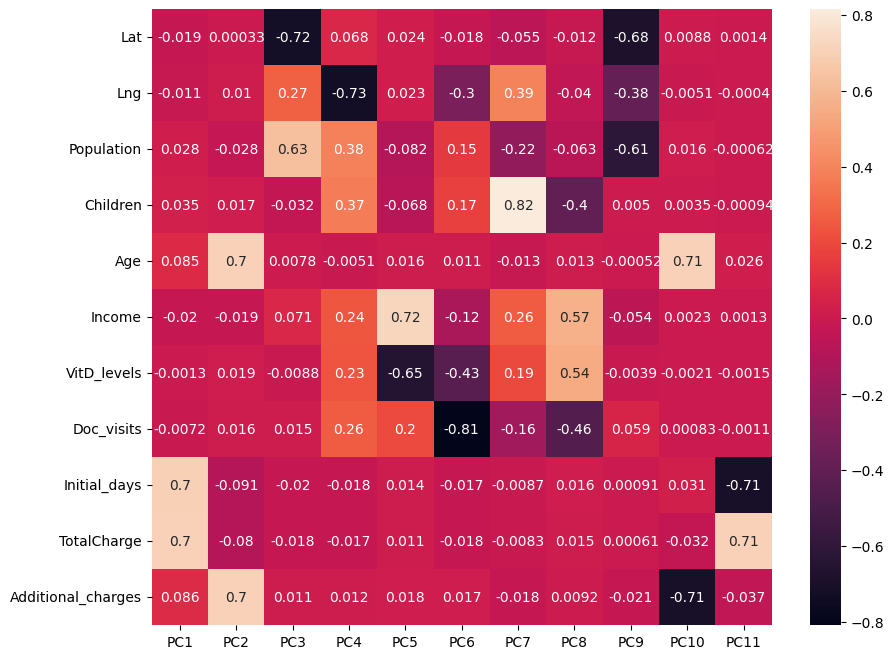

In [60]:
#Initial principal component matrix
plt.figure(figsize = (10,8))
sns.heatmap(loadings, cmap ='rocket', annot = True, fmt = '.2g')
plt.show()

In [61]:
#Create DataFrame to hold variance ratios of each column
col_var = pd.DataFrame((pca.explained_variance_ratio_ * 100).round(2), index = pc_labels)
col_var

,0
PC1,18.13
PC2,15.59
PC3,11.13
PC4,9.44
PC5,9.20
PC6,9.14
PC7,9.06
PC8,8.83
PC9,6.80
PC10,2.58


In [62]:
#Create DataFrame to Eigenvalues of each column
eigen_df = pd.DataFrame((pca.explained_variance_).round(3), index = pc_labels)
eigen_df

,0
PC1,1.995
PC2,1.715
PC3,1.225
PC4,1.038
PC5,1.013
PC6,1.006
PC7,0.996
PC8,0.971
PC9,0.748
PC10,0.283


In [63]:
#Print explained variance for principle components
sum(pca.explained_variance_ratio_*100).round(3)

100.0

In [64]:
#Explained explained variance for each principle component
pca.explained_variance_ratio_ * 100

array([18.1313528 , 15.58560978, 11.13145929,  9.43842964,  9.20439176,
        9.14180237,  9.05641249,  8.82691671,  6.8003181 ,  2.57680956,
        0.10649749])

In [65]:
#Check to make sure the cumulative sum for Eigenvalues equals 100
np.cumsum(pca.explained_variance_ratio_*100)

array([ 18.1313528 ,  33.71696259,  44.84842187,  54.28685151,
        63.49124328,  72.63304565,  81.68945814,  90.51637485,
        97.31669295,  99.89350251, 100.        ])

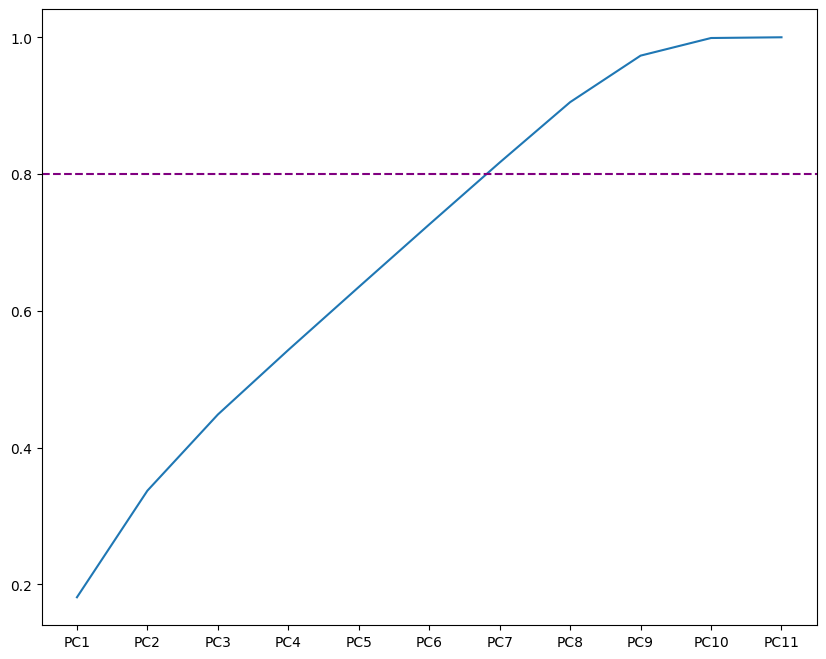

In [66]:
#Create a scree plot of the Eigenvalues
fig, ax = plt.subplots(figsize = (10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xticks(range(0,11))
ax.set_xticklabels(pc_labels)
plt.axhline(y = .8, color='purple', linestyle='--')
plt.show()

In [87]:
#PCA evaluation with 6 columns
pca = PCA(n_components = 6, random_state = 22) 
pca.fit(scaled_df)
pc = pca.transform(scaled_df)
pca_evr = pca.explained_variance_ratio_ * 100
per_var = np.round(pca_evr)
pc_labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
pc_labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [88]:
#Create DataFrame of reduced principal components
pc_df2 = pd.DataFrame(pc, columns = pc_labels)
print(pc_df2)

           PC1       PC2       PC3       PC4       PC5       PC6
0    -1.141104  0.662599  0.554357  0.161890  1.030936 -1.401566
1    -0.781869  0.522170  1.238451 -0.249388 -0.416959  0.568790
2    -1.617656  0.673450 -0.474837  0.252400 -0.959631  1.163262
3    -1.850386  1.037153 -0.978694 -0.768464  0.346888  0.934609
4    -2.168748 -1.796244  0.159815 -1.366053 -0.834778 -0.118138
...        ...       ...       ...       ...       ...       ...
9995  0.771187 -1.523817  0.286354 -1.145468  0.285583  0.608537
9996  2.051814  2.660977 -0.264870 -0.884370 -0.602083 -0.179463
9997  1.891331 -0.281756 -0.021321 -0.482588  0.771206  0.712304
9998  1.401153 -1.050483 -1.425272  0.575583 -0.866642 -0.248169
9999  1.972932  0.186131  1.222156  1.512028  0.129444  0.326784

[10000 rows x 6 columns]


In [89]:
#Create Dataframe of loadings
loadings2 = pd.DataFrame(pca.components_.T, columns = pc_labels, index = df.columns)
loadings2

,PC1,PC2,PC3,PC4,PC5,PC6
Lat,-0.018625,0.000327,-0.723266,0.067839,0.023819,-0.017688
Lng,-0.011275,0.010483,0.274593,-0.727057,0.022585,-0.304224
Population,0.027929,-0.028034,0.627811,0.384060,-0.081591,0.146954
Children,0.034799,0.017119,-0.032113,0.373775,-0.067749,0.167439
Age,0.085109,0.701287,0.007834,-0.005112,0.015735,0.011241
Income,-0.020028,-0.018668,0.071191,0.238453,0.722293,-0.121607
VitD_levels,-0.001317,0.019474,-0.008816,0.234454,-0.651394,-0.432536
Doc_visits,-0.007204,0.015503,0.015157,0.258791,0.201893,-0.809050
Initial_days,0.700306,-0.090607,-0.020318,-0.018137,0.013631,-0.017179
TotalCharge,0.701485,-0.080069,-0.018078,-0.016558,0.011336,-0.018451


In [90]:
#Create DataFrame to hold variance ratios of each column
col_var2 = pd.DataFrame((pca.explained_variance_ratio_ * 100).round(2), index = pc_labels)
col_var2


,0
PC1,18.13
PC2,15.59
PC3,11.13
PC4,9.44
PC5,9.20
PC6,9.14


In [91]:
#Create DataFrame to Eigenvalues of each column
eigen_df2 = pd.DataFrame((pca.explained_variance_).round(3), index = pc_labels)
eigen_df2


,0
PC1,1.995
PC2,1.715
PC3,1.225
PC4,1.038
PC5,1.013
PC6,1.006


In [92]:
#Print explained variance for reduced components
sum(pca.explained_variance_ratio_*100).round(3)

72.633

In [93]:
#Explained explained variance for each reduced component
pca.explained_variance_ratio_ * 100

array([18.1313528 , 15.58560978, 11.13145929,  9.43842964,  9.20439176,
        9.14180237])

In [94]:
# cumulative sum
np.cumsum(pca.explained_variance_ratio_*100)

array([18.1313528 , 33.71696259, 44.84842187, 54.28685151, 63.49124328,
       72.63304565])

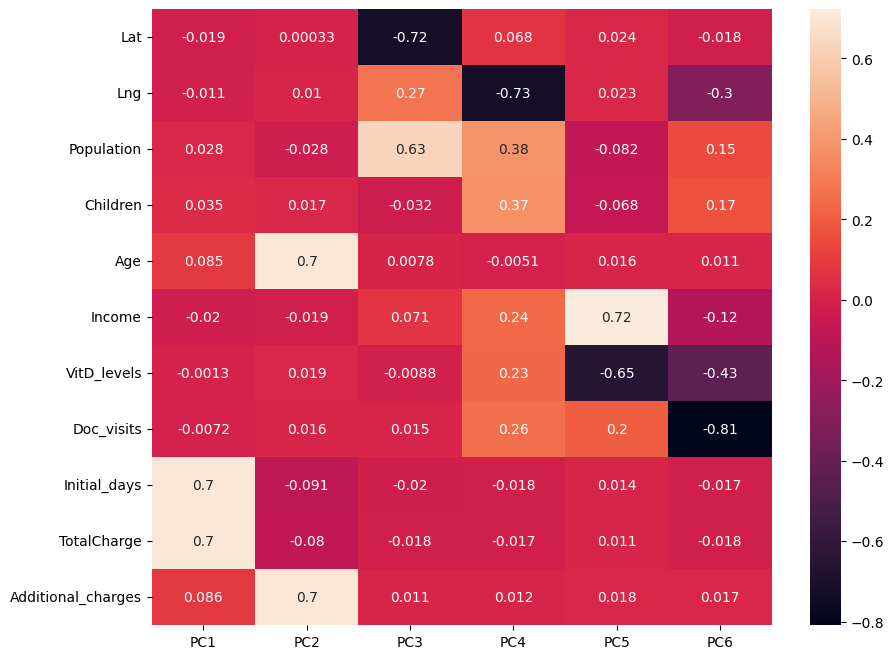

In [95]:
#Heatmap of reduced PCs and loadings
plt.figure(figsize = (10,8))
sns.heatmap(loadings2, cmap ='rocket', annot = True, fmt = '.2g')
plt.show()

-----
